In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
sns.set_style("darkgrid")

In [5]:
# A table of a hundred of random aliments with their nutrient values

# Nutrient and maximum values (defined by ourselves after observing the given ranges)
nutrients_upper_bounds = {
    # Negative
    "en": 3500, # energy value
    "sa": 20,   # saturated fatty acids
    "su": 100,  # sugars
    "so": 1000, # sodium
    
    # Positive
    "pr": 20,   # proteins
    "fi": 20,   # fruits, vegetables, nuts
    "fr": 100,  # fiber
} # lower bound is 0 for each

# Generate a table with random numbers in range [0, 1]
data_0_1 = np.random.rand(1000, 7)

# Multiply each column by its max to get the range [0, nutrient_upper_bound]
bounds = np.array(list(nutrients_upper_bounds.values()))
data = (data_0_1 * bounds).round(2)

# Create the food products table
nutrients = nutrients_upper_bounds.keys()
df = pd.DataFrame(data, columns=nutrients)

# Overview
df.head()

,en,sa,su,so,pr,fi,fr
0,1958.70,9.70,97.22,984.76,19.93,4.89,6.88
1,1629.69,5.49,58.14,539.10,4.12,17.81,52.02
2,1072.30,1.52,43.38,175.56,5.78,3.41,62.48
3,1174.43,8.89,26.84,561.02,12.88,18.83,98.32
4,1433.66,17.54,32.72,840.32,8.63,10.93,26.19


In [3]:
def nutri_score():
    # Evaluation intervals for each nutrient
    nutrient_evaluation_ranges = {
        # Negative
        "en": np.arange(335, 3351, 335),
        "sa": np.arange(1, 11, 1),
        "su": np.arange(4.5, 46, 4.5),
        "so": np.arange(90, 901, 90),  
        
        # Positive
        "pr": np.arange(1.6, 8.1, 1.6), 
        "fr": np.arange(40, 81, 20),
        "fi": np.array([.9, 1.9, 2.8, 3.7, 4.7]),
    }
    
    # Nutri score empty table
    ns_df = pd.DataFrame(columns=nutrient_evaluation_ranges.keys())
    
    # Nutrient evaluations (0-5 for positive nutrients, and 0-10 for negative ones)
    for nut, bnd in nutrient_evaluation_ranges.items():
        ns_df[nut] = df[nut].apply(lambda x: sum(x > bnd))
    
    # Special case: fruits, vegetables and nuts -> 0, 1, 2, and then 5
    ns_df.loc[ns_df.fr == 3, "fr"] = 5
    
    # Nutri score calculation: sum(negative) - sum(positive)
    ns_df["ns"] = ns_df.apply(lambda x: sum(x[:4]) - sum(x[4:]), axis=1)
    
    return ns_df

In [7]:
df.head()

,en,sa,su,so,pr,fi,fr
0,1958.70,9.70,97.22,984.76,19.93,4.89,6.88
1,1629.69,5.49,58.14,539.10,4.12,17.81,52.02
2,1072.30,1.52,43.38,175.56,5.78,3.41,62.48
3,1174.43,8.89,26.84,561.02,12.88,18.83,98.32
4,1433.66,17.54,32.72,840.32,8.63,10.93,26.19


In [6]:
ns = nutri_score()
ns.head()

,en,sa,su,so,pr,fr,fi,ns
0,5,9,10,10,5,0,5,24
1,4,5,10,5,2,1,5,16
2,3,1,9,1,3,2,3,6
3,3,8,5,6,5,5,5,7
4,4,10,7,9,5,0,5,20


In [15]:
sum(ns.ns == 40)

0

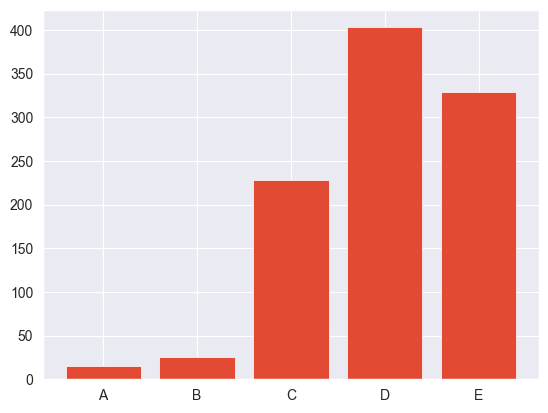

In [5]:
x = pd.cut(nutri_score().ns, bins=[-16, -1, 2, 10, 18, 41]).value_counts().sort_index()
plt.bar(["A", "B", "C", "D", "E"], x.values)
plt.show()